In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [160]:
import os

In [161]:
os.chdir("D:\\JISHU AI\\EDA")

In [162]:
df=pd.read_csv("python practise data.csv")

In [163]:
df.isnull().sum()


Unnamed: 0      0
Price           0
Age           100
KM              0
FuelType      100
HP              0
MetColor      150
Automatic       0
CC              0
Doors           0
Weight          0
dtype: int64

In [164]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1436 non-null   int64  
 1   Price       1436 non-null   int64  
 2   Age         1336 non-null   float64
 3   KM          1436 non-null   object 
 4   FuelType    1336 non-null   object 
 5   HP          1436 non-null   object 
 6   MetColor    1286 non-null   float64
 7   Automatic   1436 non-null   int64  
 8   CC          1436 non-null   int64  
 9   Doors       1436 non-null   object 
 10  Weight      1436 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 123.5+ KB


In [168]:
df["KM"].value_counts()


??       15
1         8
59000     7
36000     7
43000     7
         ..
63635     1
63792     1
64193     1
65170     1
17016     1
Name: KM, Length: 1256, dtype: int64

In [138]:
df["HP"].unique()


array(['90', '????', '192', '110', '97', '71', '116', '98', '69', '86',
       '72', '107', '73'], dtype=object)

In [139]:
df["Doors"].unique()

array(['three', '3', '5', '4', 'four', 'five', '2'], dtype=object)

In [169]:
df1=pd.read_csv("python practise data.csv",na_values=['????','??'],index_col=0)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1336 non-null   float64
 2   KM         1421 non-null   float64
 3   FuelType   1336 non-null   object 
 4   HP         1430 non-null   float64
 5   MetColor   1286 non-null   float64
 6   Automatic  1436 non-null   int64  
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   object 
 9   Weight     1436 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 123.4+ KB


In [173]:
df1.loc[df1["Doors"]=='three',"Doors"]=3

In [174]:
df1["Doors"]=df1["Doors"].replace('four',4)
df1["Doors"].replace("five",5,inplace=True)
df1.Doors.unique()

array([3, '3', '5', '4', 4, 5, '2'], dtype=object)

In [175]:
df1["Doors"]=df1["Doors"].astype("int64")

In [176]:
df1.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,3,1165
1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165
2,13950,24.0,41711.0,Diesel,90.0,NaN,0,2000,3,1165
3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165
4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170


In [177]:
df1["MetColor"]=df1["MetColor"].astype("object")
df1["Automatic"]=df1["Automatic"].astype("object")

# DATA ANALYSIS

In [178]:
df1_num=df1.select_dtypes(exclude="object")

In [181]:
df1_num.head()

,Price,Age,KM,HP,CC,Doors,Weight
0,13500,23.0,46986.0,90.0,2000,3,1165
1,13750,23.0,72937.0,90.0,2000,3,1165
2,13950,24.0,41711.0,90.0,2000,3,1165
3,14950,26.0,48000.0,90.0,2000,3,1165
4,13750,30.0,38500.0,90.0,2000,3,1170


In [179]:
df1_ob=df1.select_dtypes(include="object")

In [182]:
df1_ob.head()

,FuelType,MetColor,Automatic
0,Diesel,1.0,0
1,Diesel,1.0,0
2,Diesel,NaN,0
3,Diesel,0.0,0
4,Diesel,0.0,0


# Temporary drop missing values

In [183]:
df1_num.isnull().sum()

Price       0
Age       100
KM         15
HP          6
CC          0
Doors       0
Weight      0
dtype: int64

In [148]:
df1_ob.isnull().sum()

FuelType     100
MetColor     150
Automatic      0
dtype: int64

In [184]:
df1_num.dropna(inplace=True)


In [185]:
df1_ob.dropna(inplace=True)

# Univariate Analysis

In [190]:
import warnings
warnings.filterwarnings("ignore")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018FE2730388>,
      dtype=object)

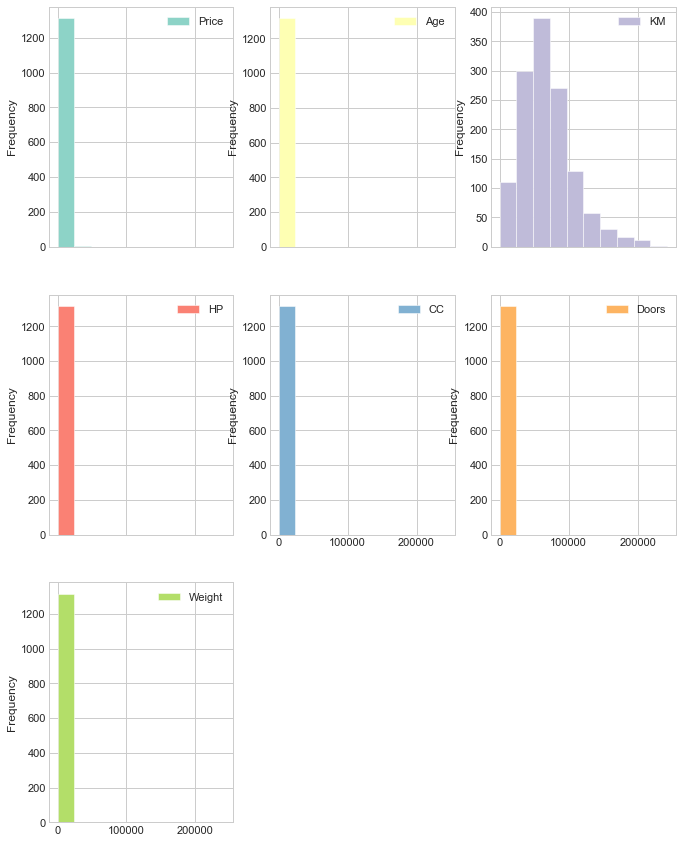

In [189]:
df1_num.plot(kind="hist",subplots=True,layout=(3,3),figsize=(10,15))

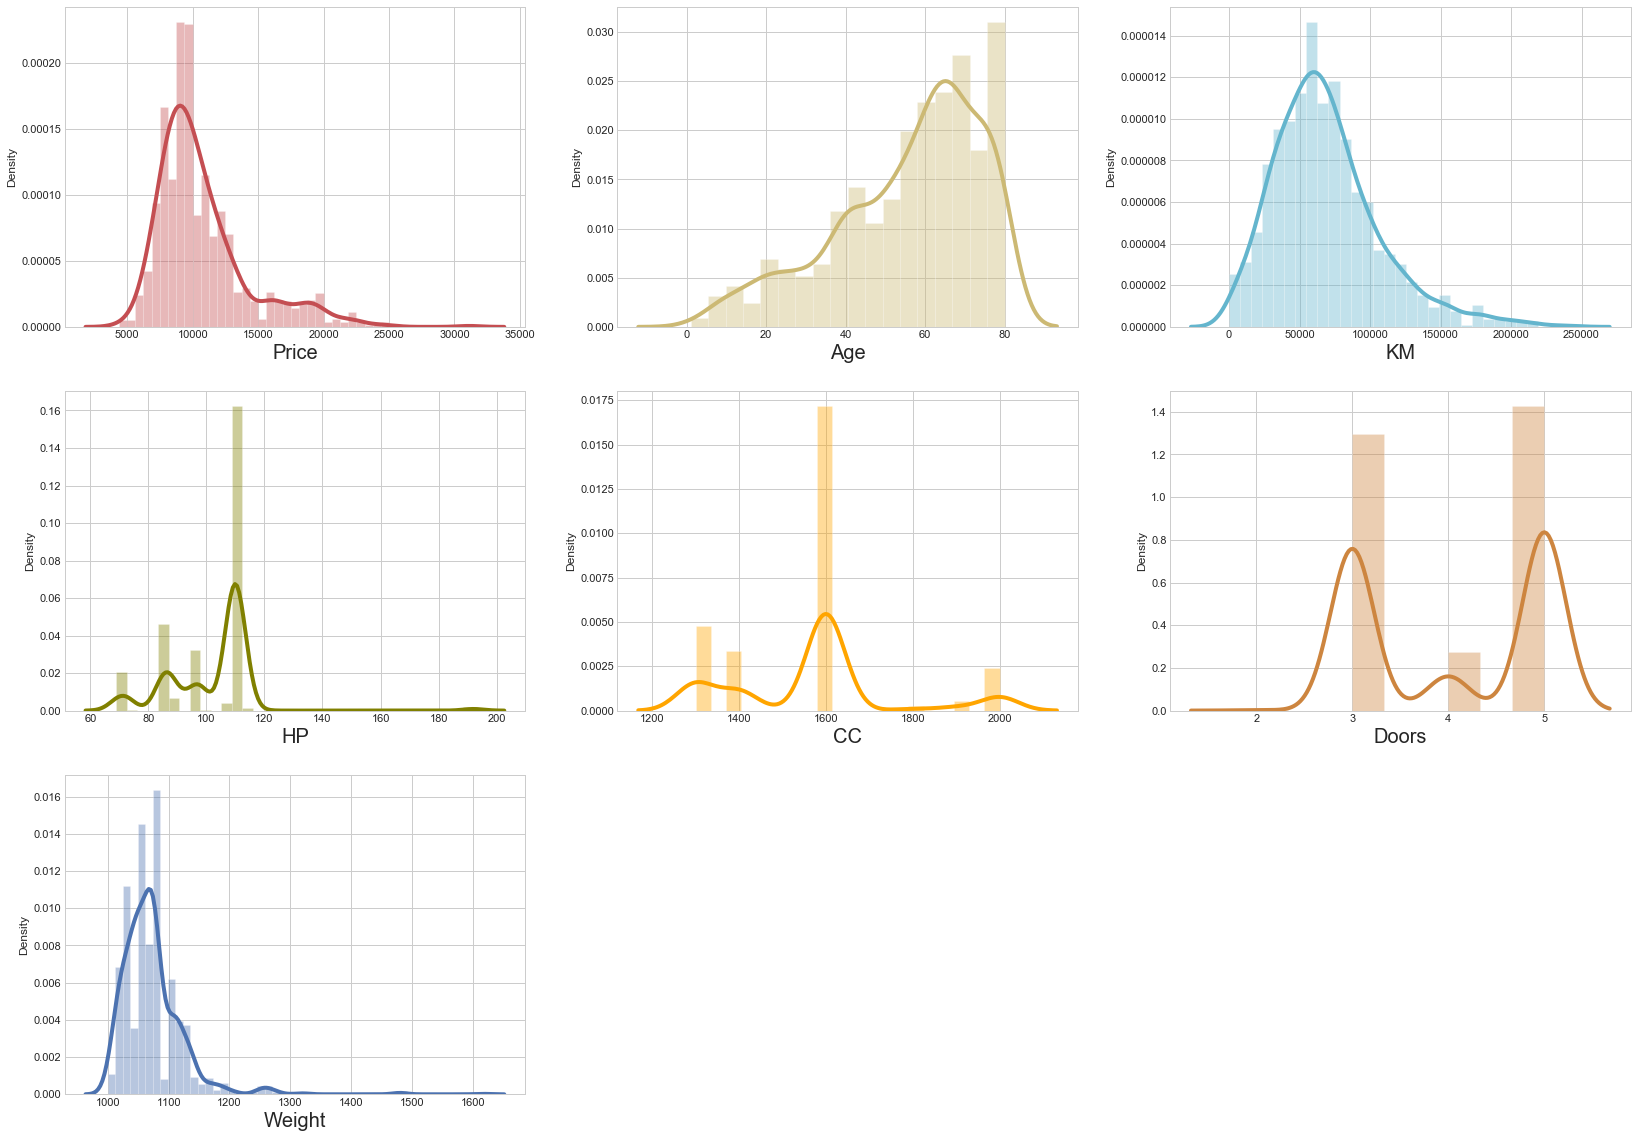

In [186]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(25,20))
col=["r","y","c","olive","orange","peru","b","g"]
plotnumber=1
j=0
for i in df1_num:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df1_num[i],color=col[j])
        plt.xlabel(i,fontsize=20)
        plotnumber+=1
        j+=1


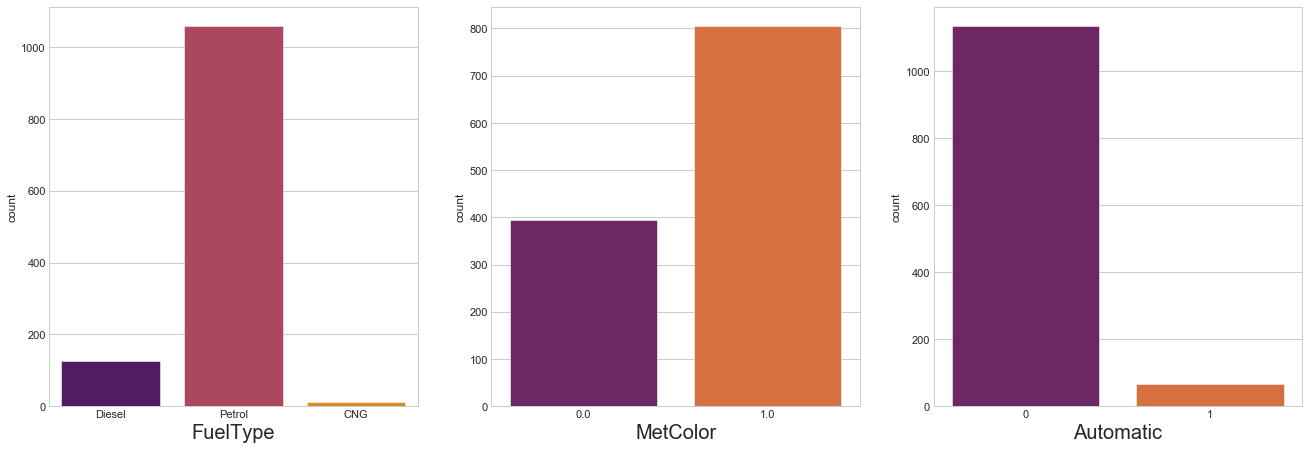

In [191]:
plt.figure(figsize=(20,25))
plotnumber=1
for i in df1_ob:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.countplot(df1_ob[i],palette="inferno")
        plt.xlabel(i,fontsize=20)
        plotnumber+=1


# Bivariate Analysis

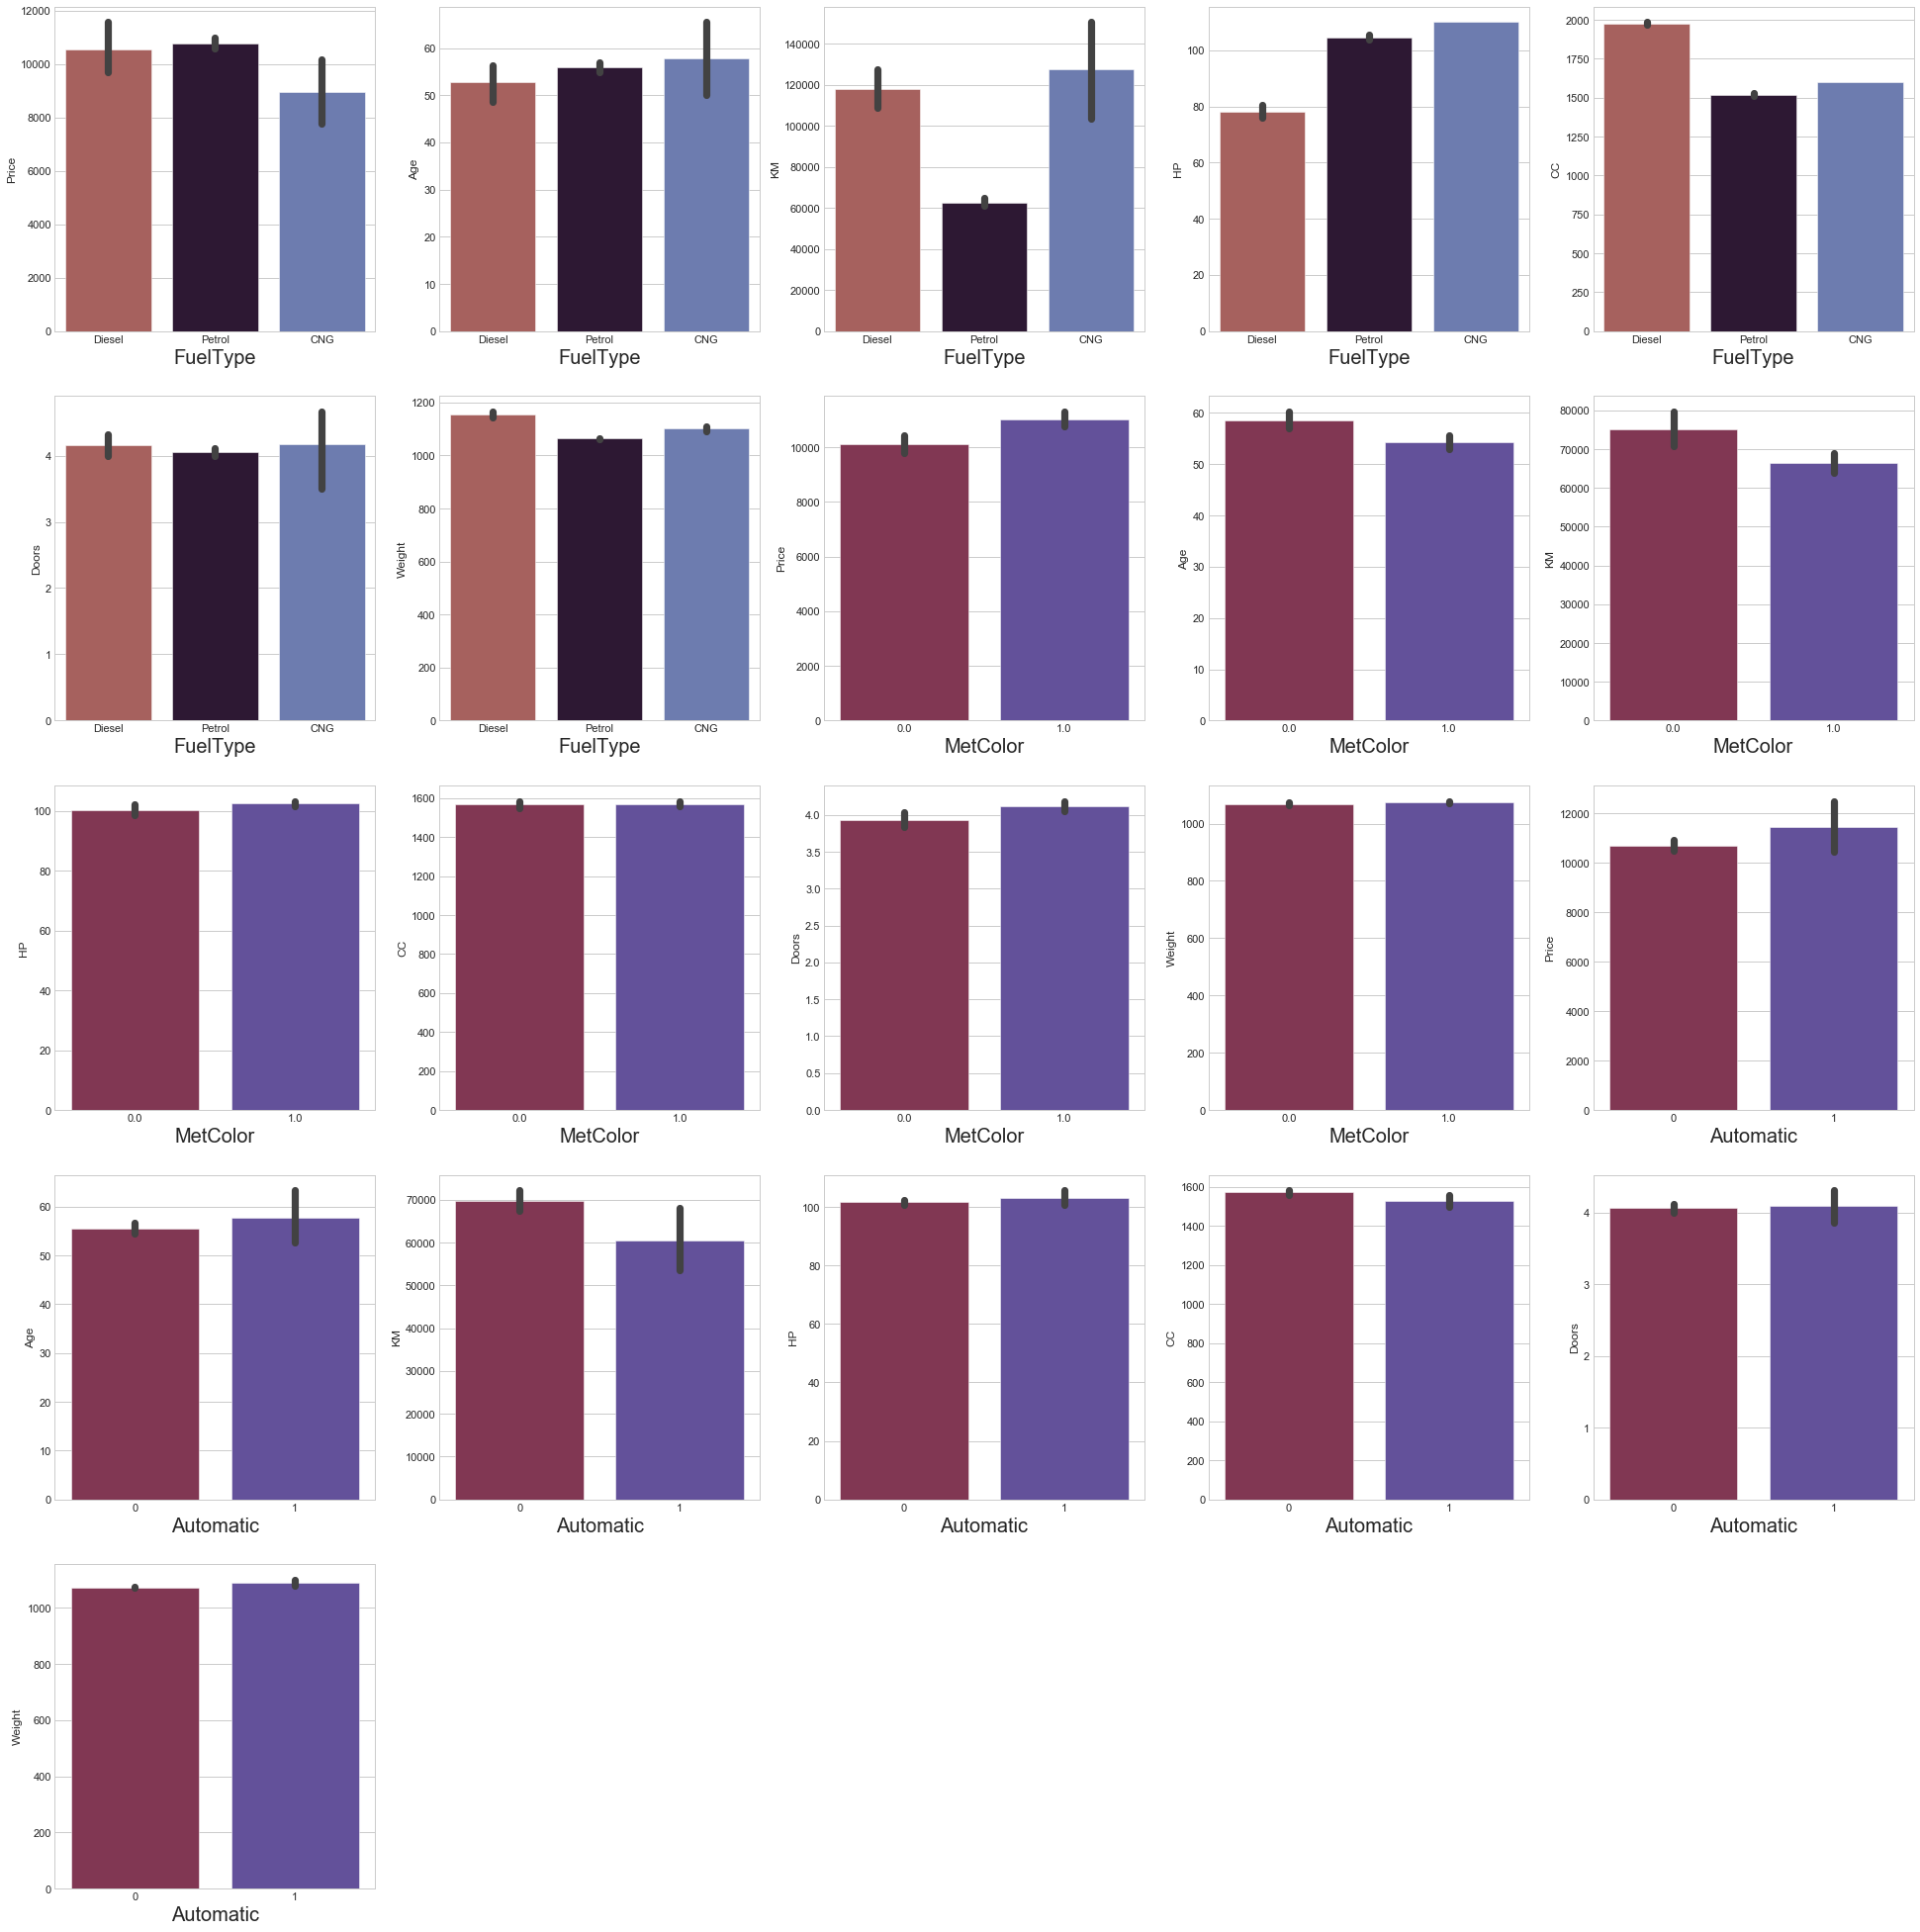

In [85]:
plt.figure(figsize=(30,35))
plotnumber=1
for i in df1_ob:
    for j in df1_num:
        if plotnumber<=25:
            ax=plt.subplot(5,5,plotnumber)
            sns.barplot(df1_ob[i],df1_num[j],palette="twilight_r")
            plt.xlabel(i,fontsize=20)
            plotnumber+=1

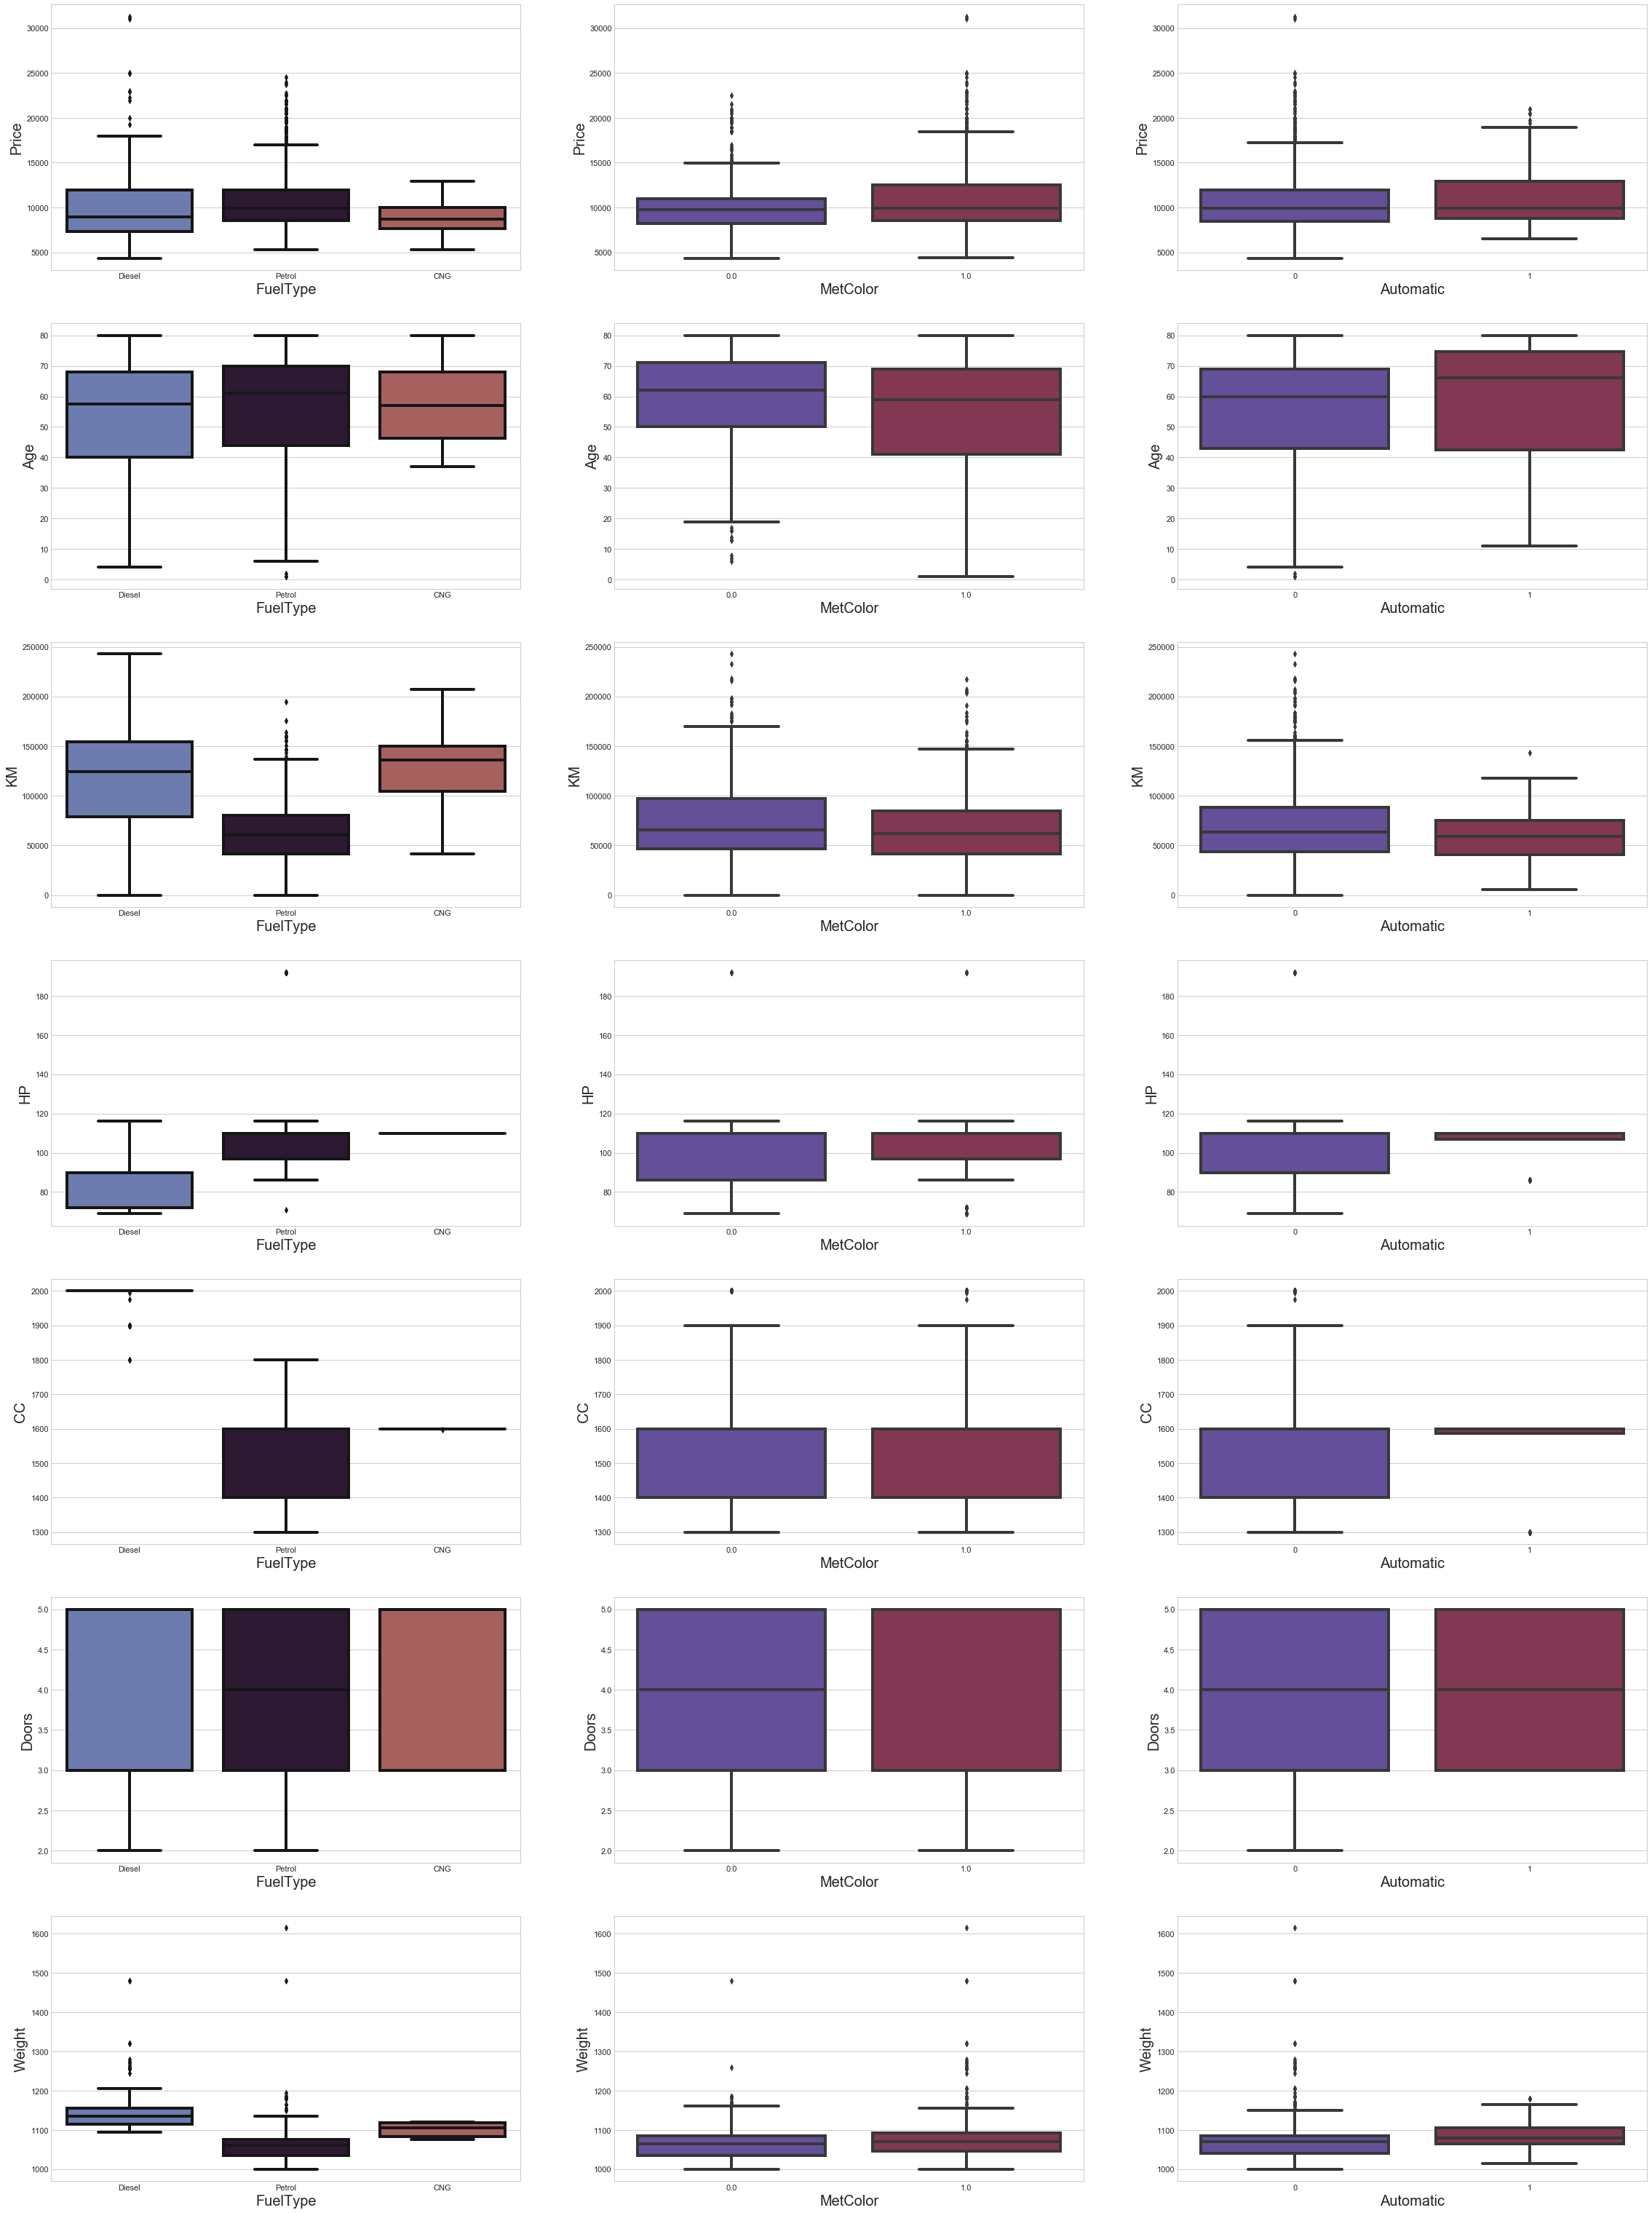

In [192]:
plt.figure(figsize=(35,55))
plotnumber=1
for i in df1_num:
    for j in df1_ob: 
        if plotnumber<=25:
            ax=plt.subplot(7,3,plotnumber)
            sns.boxplot(y=df1_num[i],x=df1_ob[j],palette="twilight")
            plt.xlabel(j,fontsize=20)
            plt.ylabel(i,fontsize=20)
            plotnumber+=1

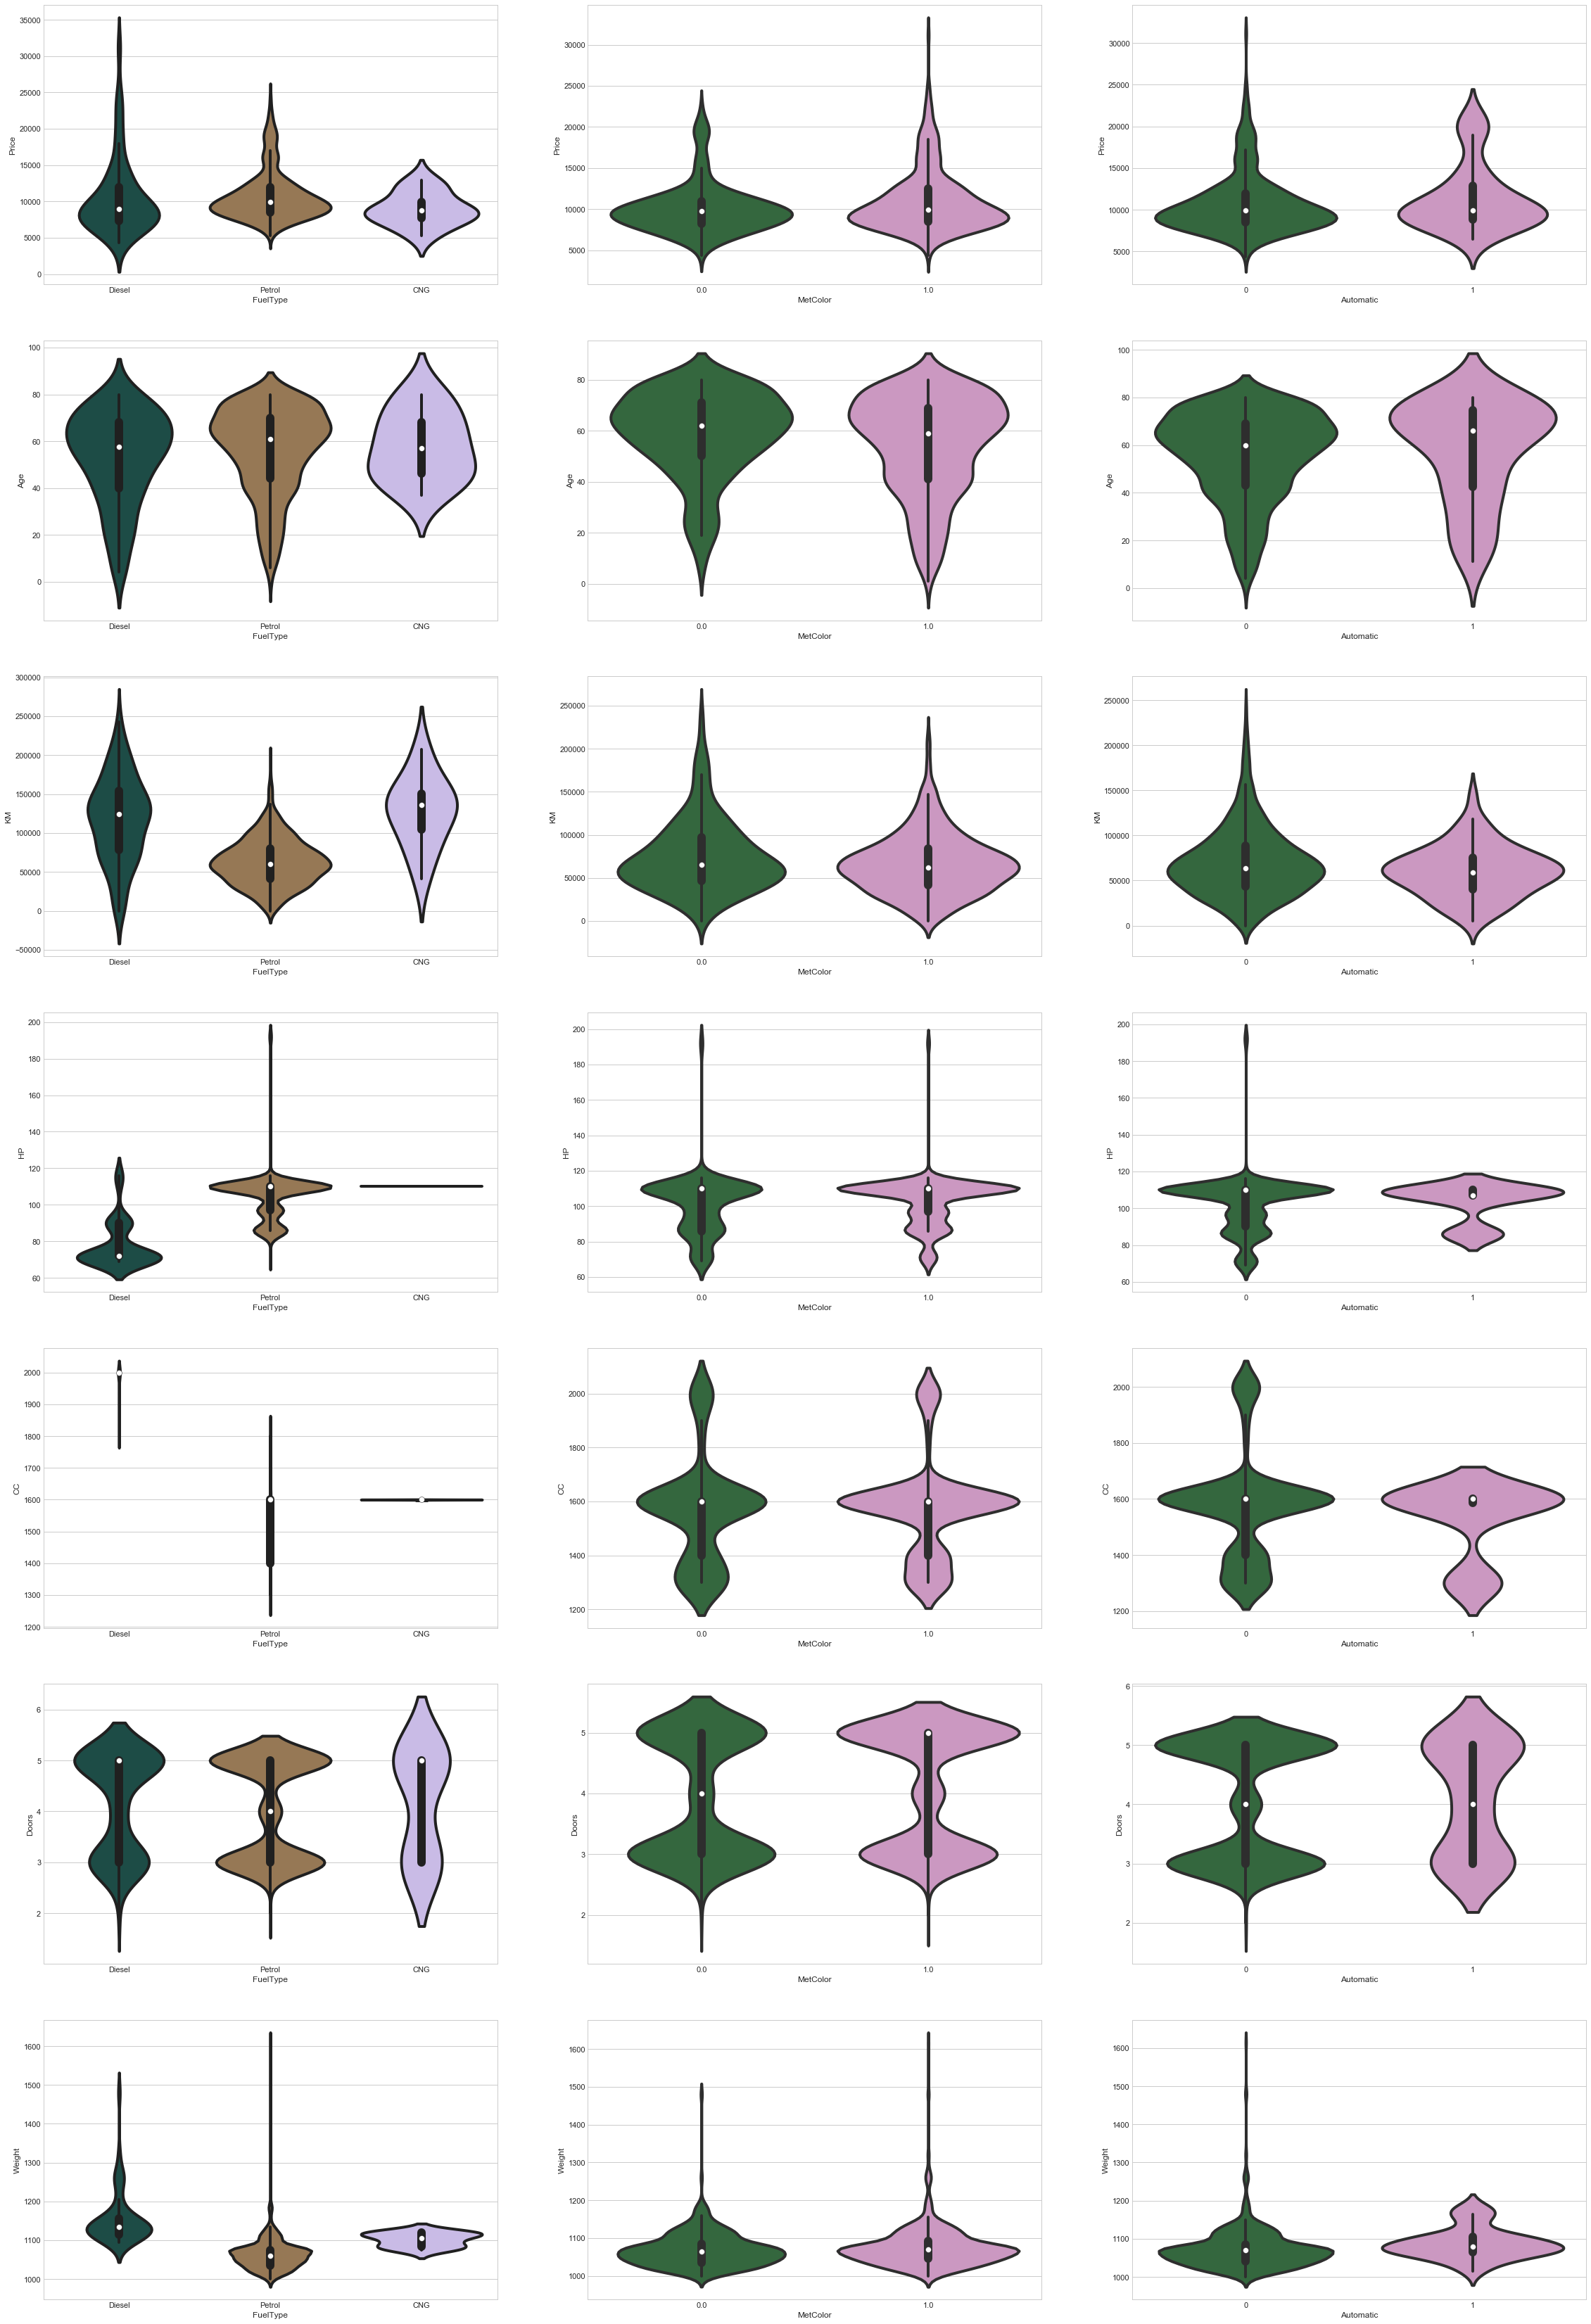

In [112]:
plt.figure(figsize=(35,60))
plotnumber=1
for i in df1_num:
    for j in df1_ob: 
        if plotnumber<=25:
            ax=plt.subplot(7,3,plotnumber)
            sns.violinplot(y=df1_num[i],x=df1_ob[j],palette="cubehelix")
            plt.xlabel(j)
            plt.ylabel(i)
            plotnumber+=1

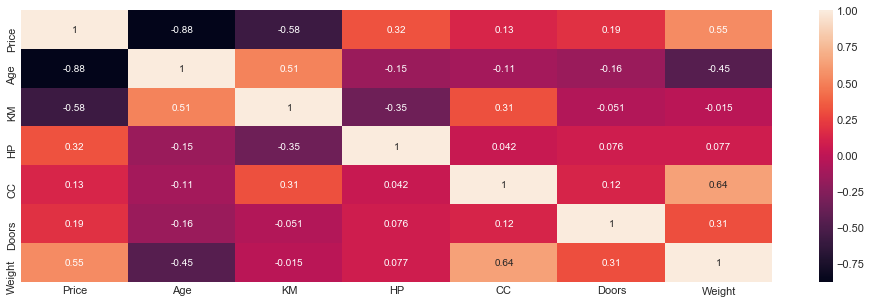

In [117]:
plt.figure(figsize=(15,5), facecolor='white')
sns.heatmap(df1_num.corr(),annot=True)



In [193]:
df1_num.columns

Index(['Price', 'Age', 'KM', 'HP', 'CC', 'Doors', 'Weight'], dtype='object')

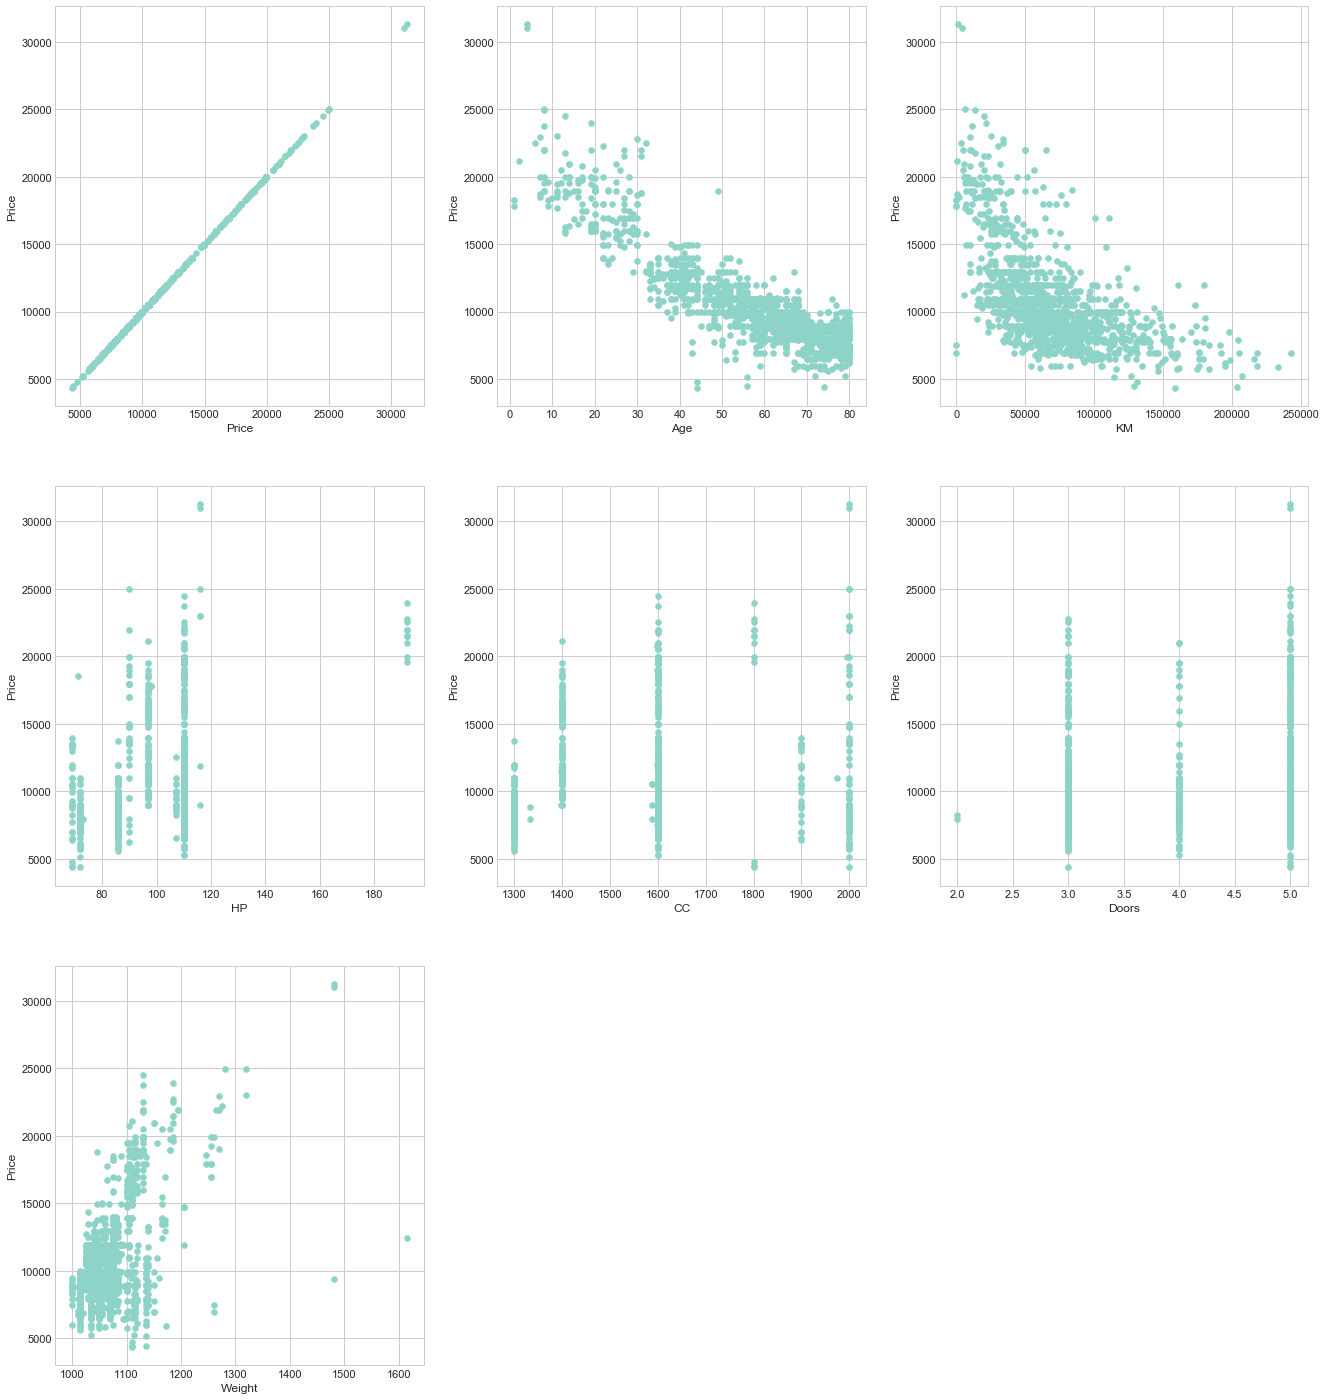

In [158]:
plt.figure(figsize=(20,25))
plotnumber=1
for i in df1_num.columns:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        plt.scatter(y=df1_num["Price"],x=df1_num[i])
        plt.xlabel(i)
        plt.ylabel("Price")
        plotnumber+=1

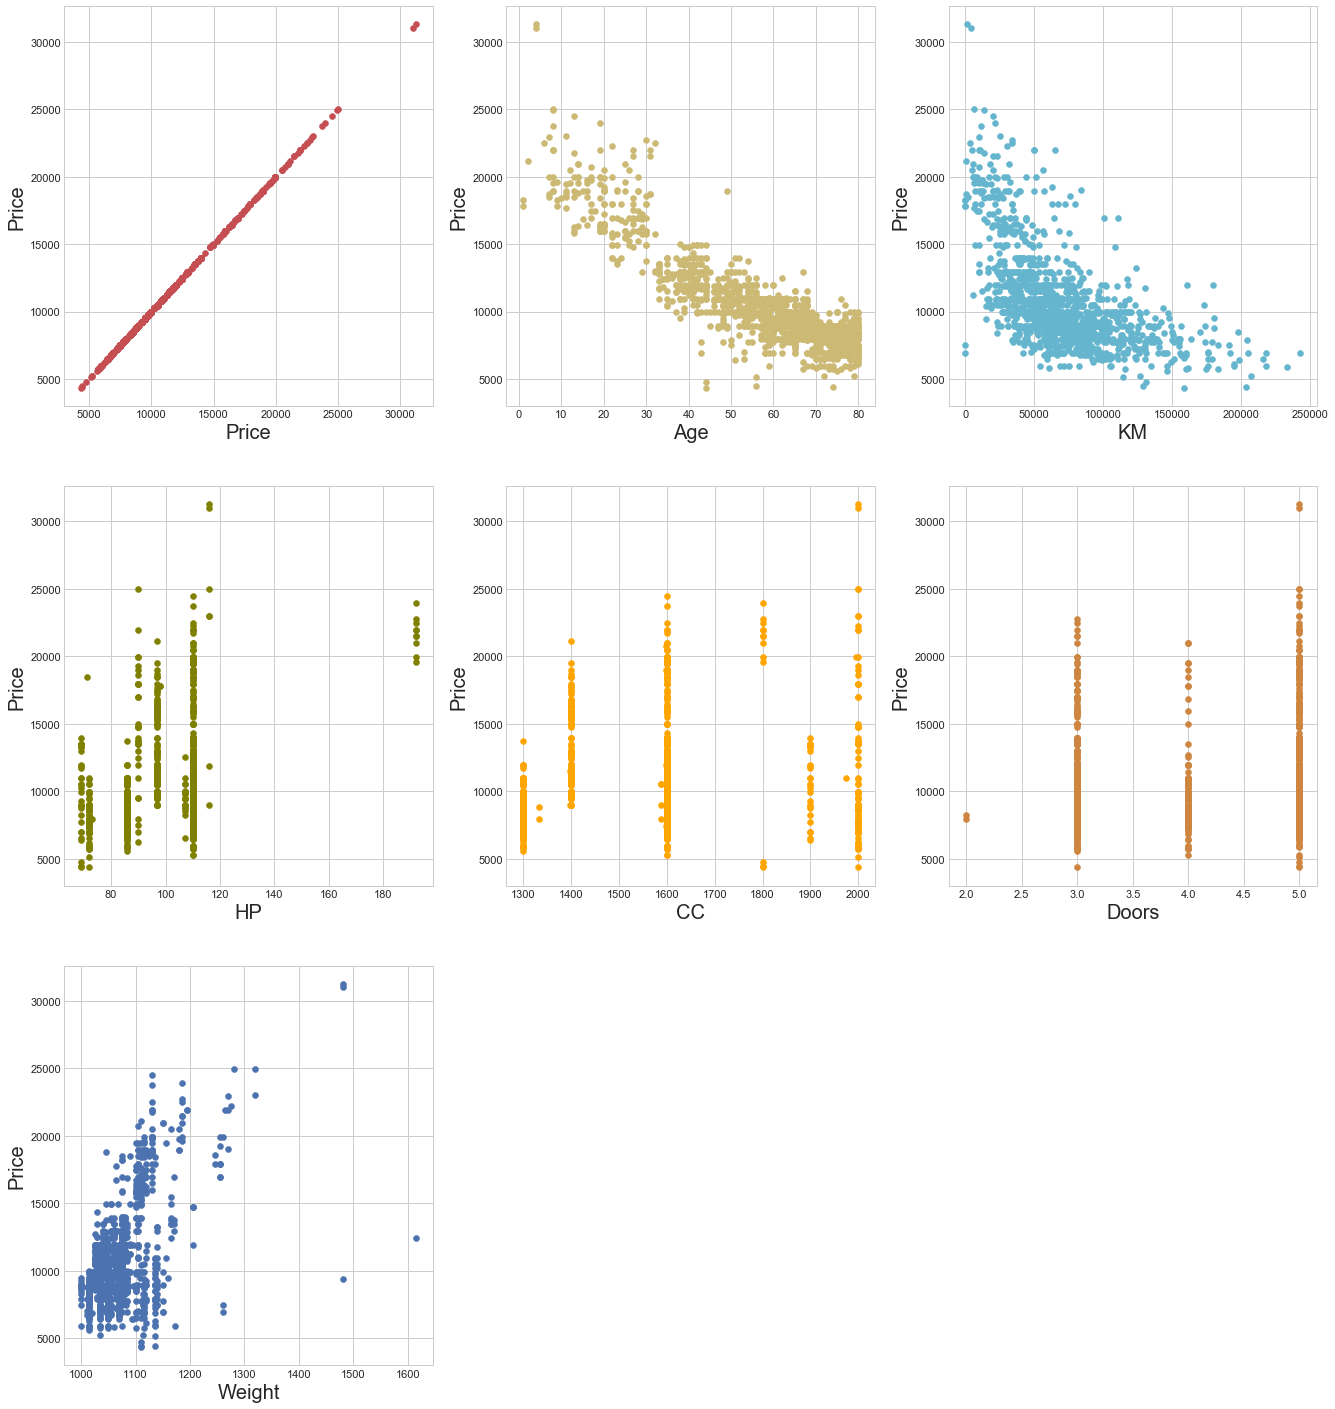

In [194]:
plt.figure(figsize=(20,25))
col=["r","y","c","olive","orange","peru","b","g"]
plotnumber=1
j=0
for i in df1_num:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        plt.scatter(y=df1_num["Price"],x=df1_num[i],color=col[j])
        plt.xlabel(i,fontsize=20)
        plt.ylabel("Price",fontsize=20)
        plotnumber+=1
        j+=1